In [37]:
# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [ ]:
import pandas as pd
customers=pd.read_csv("C:/Users/rahul/Downloads/Data_Science/Customers.csv")

In [38]:
print(customers.info())
print(customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


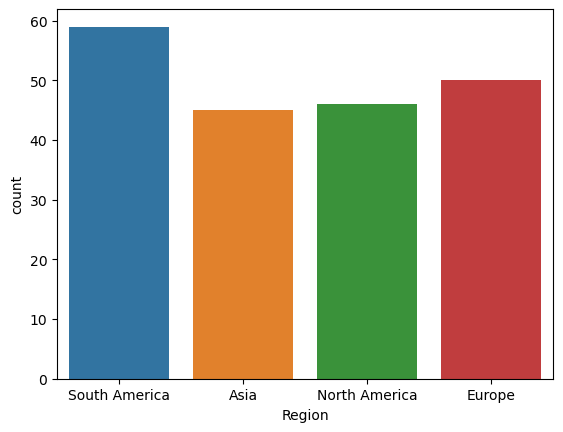

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)
plt.show()

In [40]:
products=pd.read_csv(r"C:\Users\rahul\Downloads\Data_Science\Products.csv")
transactions=pd.read_csv(r"C:\Users\rahul\Downloads\Data_Science\Transactions.csv")

In [41]:
print(products.info())
print(products.isnull().sum())
print(transactions.info())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-nul


Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Statistical Summary:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    1

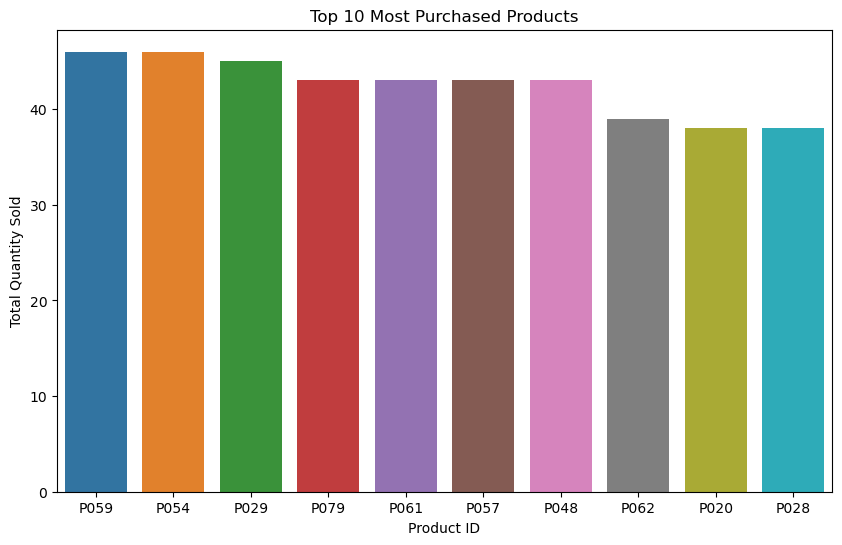

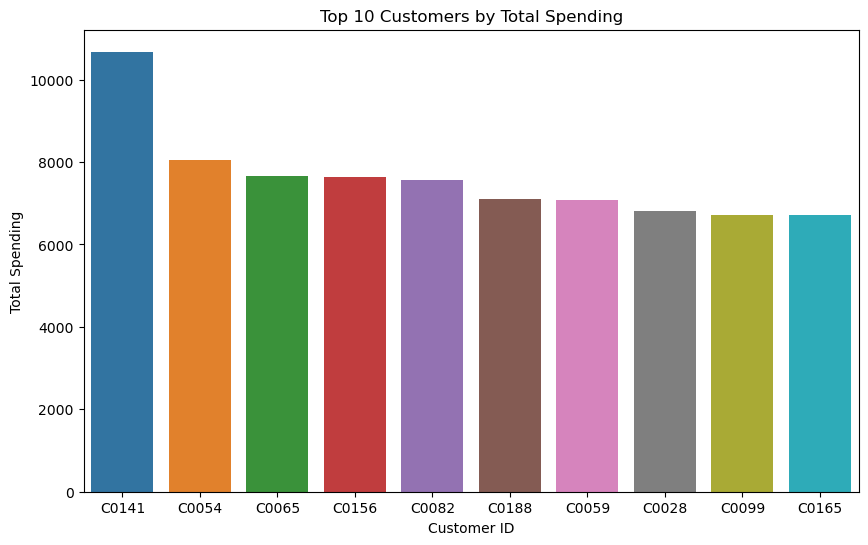

In [42]:
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


print(transactions.head())

print("\nStatistical Summary:\n", transactions.describe())


transactions = transactions.dropna()  

transactions = transactions.drop_duplicates()


transactions['TotalValue'] = transactions['Price'] * transactions['Quantity']


top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='ProductID', y='Quantity', data=top_products)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()


top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TotalValue', data=top_customers)
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()